# Four wave mixing simulation

In [19]:
import numpy as np

# Conservation of energy
$$
2 \omega_{p} = \omega_{s} + \omega_{i}
$$

$\omega_{s}$ is the signal frequency which corresponds to the shorter wavelength photon produced in four wave mixing.  
$\omega_{i}$ is the idler frequency which corresponds to the longer wavelength photon produced in four wave mixing process.  
$\omega_{p}$ is the pump frequency

# Conservation of momentum
$$
2\beta(\omega_{p}) = \beta(\omega_{s}) + \beta(\omega_{i}) + 2\gamma P
$$
Subtracting all onto one side gives
$$
2\beta(\omega_{p}) - \beta(\omega_{s}) - \beta(\omega_{i}) - 2\gamma P = 0
$$

$\gamma$ is approximately $0.2Wm^{-1}$  and $P$ is approximately equal to $100W$

Mid IR wavelengths range roughly from 2500–25000nm  
This corresponds to frequencies of 1.2*10^13 to 1.2*10^14  
Which corresponds to angular frequencies of 2 $\pi$ * these frequencies

Will be using 1 micron to 1.6 microns for pump wavelength, with 100 points for spacing.  
Signal needs a slightly larger range because the solution we are expecting is steeper in the shorter wavelength range.  
100 by 100 matrices should work fine. Anything bigger than 200 by 200 will be too slow.

In [20]:
#import RefractiveIndexClass

In [21]:
import sys
module_path = r"C:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\FYP_Github_V2\Modules\Refractive_Indices"
#module_path = "C:\\Users\\molly\\OneDrive - University of Bath\\Uni\\Final Year\\Project\\FYP_Github_V2\\Modules\\Refractive_Indices"
sys.path.append(module_path)

# Now you can import the class from the module
from RefractiveIndexClass import RefractiveIndex

In [22]:
# Function to convert wavelength to angular frequency
def lambda_to_ang_freq(wavelength_matrix):
    #return (2*np.pi*3e8*RefractiveIndexClass.RefractiveIndex.n_fs(wavelength_matrix*1.0e-9,parameter="wavelength")) / wavelength_matrix
    return (2*np.pi*3e8) / wavelength_matrix

In [23]:
# PUMP WAVELENGTH MATRIX

def create_pump_matrix(rows, columns, start_value, step):
    matrix = np.zeros((rows, columns))
    for i in range(columns):
        matrix[:, i] = np.full(rows, start_value + i * step)
    return matrix

# Number of rows and columns, start and end values for the pump wavelengths, and spacing between each column value
rows = 1000
columns = 1000
start_value = 1e-6 #1 micron in m
end_value = 1.6e-6
step = (end_value - start_value) / columns

pump_wavelength_matrix = create_pump_matrix(rows, columns, start_value, step)

pump_frequency_matrix = lambda_to_ang_freq(pump_wavelength_matrix)

# for i in range(pump_frequency_matrix.shape[0]):
#     for j in range(pump_frequency_matrix.shape[1]):
#         pump_frequency_matrix[i, j] = pump_frequency_matrix[i,j]*RefractiveIndexClass.RefractiveIndex.n_fs(pump_frequency_matrix[i, j],parameter="omega")

#print(pump_frequency_matrix)

pump_wavelength_matrix

array([[1.0000e-06, 1.0006e-06, 1.0012e-06, ..., 1.5982e-06, 1.5988e-06,
        1.5994e-06],
       [1.0000e-06, 1.0006e-06, 1.0012e-06, ..., 1.5982e-06, 1.5988e-06,
        1.5994e-06],
       [1.0000e-06, 1.0006e-06, 1.0012e-06, ..., 1.5982e-06, 1.5988e-06,
        1.5994e-06],
       ...,
       [1.0000e-06, 1.0006e-06, 1.0012e-06, ..., 1.5982e-06, 1.5988e-06,
        1.5994e-06],
       [1.0000e-06, 1.0006e-06, 1.0012e-06, ..., 1.5982e-06, 1.5988e-06,
        1.5994e-06],
       [1.0000e-06, 1.0006e-06, 1.0012e-06, ..., 1.5982e-06, 1.5988e-06,
        1.5994e-06]])

In [24]:
#SIGNAL WAVELENGTH MATRIX

def create_signal_matrix(rows, columns, min_value, max_value):
    matrix = np.zeros((rows, columns))
    for i in range(columns):
        matrix[:, i] = np.linspace(min_value, max_value, rows)
    return matrix

# Example usage
rows = 1000
columns = 1000
min_value = 1.0e-6
max_value = 1.6e-6

signal_wavelength_matrix = create_signal_matrix(rows, columns, min_value, max_value)
signal_frequency_matrix = lambda_to_ang_freq(signal_wavelength_matrix)

# for i in range(signal_frequency_matrix.shape[0]):
#     for j in range(signal_frequency_matrix.shape[1]):
#         signal_frequency_matrix[i, j] = signal_frequency_matrix[i,j]*RefractiveIndexClass.RefractiveIndex.n_fs(signal_frequency_matrix[i, j],parameter="omega")

print(signal_wavelength_matrix)

[[1.0000000e-06 1.0000000e-06 1.0000000e-06 ... 1.0000000e-06
  1.0000000e-06 1.0000000e-06]
 [1.0006006e-06 1.0006006e-06 1.0006006e-06 ... 1.0006006e-06
  1.0006006e-06 1.0006006e-06]
 [1.0012012e-06 1.0012012e-06 1.0012012e-06 ... 1.0012012e-06
  1.0012012e-06 1.0012012e-06]
 ...
 [1.5987988e-06 1.5987988e-06 1.5987988e-06 ... 1.5987988e-06
  1.5987988e-06 1.5987988e-06]
 [1.5993994e-06 1.5993994e-06 1.5993994e-06 ... 1.5993994e-06
  1.5993994e-06 1.5993994e-06]
 [1.6000000e-06 1.6000000e-06 1.6000000e-06 ... 1.6000000e-06
  1.6000000e-06 1.6000000e-06]]


In [25]:
# CALCULATION TO GET IDLER WAVELENGTH MATRIX

#idler_wavelength_matrix = 2*pump_wavelength_matrix - signal_wavelength_matrix #Using cons of energy equation

idler_frequency_matrix = 2*pump_frequency_matrix - signal_frequency_matrix

# for i in range(idler_frequency_matrix.shape[0]):
#     for j in range(idler_frequency_matrix.shape[1]):
#         idler_frequency_matrix[i, j] = idler_frequency_matrix[i,j]*RefractiveIndexClass.RefractiveIndex.n_fs(idler_frequency_matrix[i, j],parameter="omega")

idler_frequency_matrix

array([[1.88495559e+15, 1.88269500e+15, 1.88043712e+15, ...,
        4.73892602e+14, 4.73007370e+14, 4.72122802e+14],
       [1.88608702e+15, 1.88382643e+15, 1.88156855e+15, ...,
        4.75024028e+14, 4.74138796e+14, 4.73254228e+14],
       [1.88721709e+15, 1.88495650e+15, 1.88269862e+15, ...,
        4.76154097e+14, 4.75268865e+14, 4.74384297e+14],
       ...,
       [2.59092882e+15, 2.58866823e+15, 2.58641035e+15, ...,
        1.17986583e+15, 1.17898060e+15, 1.17809603e+15],
       [2.59137154e+15, 2.58911095e+15, 2.58685307e+15, ...,
        1.18030855e+15, 1.17942332e+15, 1.17853875e+15],
       [2.59181394e+15, 2.58955335e+15, 2.58729547e+15, ...,
        1.18075095e+15, 1.17986572e+15, 1.17898115e+15]])

# Turning above code into a function

In [26]:
def BuildMatrixFromArray(array, n=-1, repeat_array_as = "columns"):
    if n == -1: n = len(array)
    if repeat_array_as.lower() == "columns":
        constructed_matrix = np.zeros((len(array), n))
        for i in range(n):
            constructed_matrix[:, i] = np.transpose(array)
        return constructed_matrix
    elif repeat_array_as.lower() == "rows":
        constructed_matrix = np.zeros((n, len(array)))
        for i in range(n):
            constructed_matrix[i, :] = array
        return constructed_matrix
    else:
        return ValueError("Argument given for 'repeat_array_as' is unrecognised. It takes arguments 'rows' or 'columns'")

In [43]:
# Function to convert wavelength to angular frequency
def lambda_to_ang_freq(wavelength_matrix):
    #return (2*np.pi*3e8*RefractiveIndexClass.RefractiveIndex.n_fs(wavelength_matrix*1.0e-9,parameter="wavelength")) / wavelength_matrix
    #return (2*np.pi*3e8) / wavelength_matrix
    return (2*np.pi*3e8) / wavelength_matrix

In [28]:
gamma = 2e-4 #Unit is m^-1 W^-1
P = 100 # W

C:\Users\met50\AppData\Local\Temp\ipykernel_11932\2976859689.py:16: RuntimeWarning: divide by zero encountered in divide
  idler_matrix_wavelengths = 1 / (2/(pump_matrix_wavelengths) - 1/(signal_matrix_wavelengths))
C:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\FYP_Github_V2\Modules\Refractive_Indices\RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
C:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\FYP_Github_V2\Modules\Refractive_Indices\RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.89

wavelength idler matrix
[[5.14578776e+06 5.13817944e+06 5.13057790e+06 ... 8.51835347e+03
  4.25781535e+03            nan]
 [5.16303060e+06 5.15542259e+06 5.14782135e+06 ... 2.89217110e+04
  2.46601029e+04 2.04014930e+04]
 [5.18022112e+06 5.17261341e+06 5.16501249e+06 ... 4.92728811e+04
  4.50088896e+04 4.07481739e+04]
 ...
 [1.20376095e+07 1.20299794e+07 1.20223564e+07 ... 6.81832235e+06
  6.81472790e+06 6.81113570e+06]
 [1.20403855e+07 1.20327554e+07 1.20251323e+07 ... 6.82108527e+06
  6.81749082e+06 6.81389862e+06]
 [1.20431582e+07 1.20355280e+07 1.20279049e+07 ... 6.82384487e+06
  6.82025043e+06 6.81665823e+06]]


C:\Users\met50\AppData\Local\Temp\ipykernel_11932\2976859689.py:33: UserWarning: The following kwargs were not used by contour: 'color'
  phase_matching_contour = plt.contour(pump_wavelengths, signal_wavelengths, delta_beta, levels=[0], color='k')


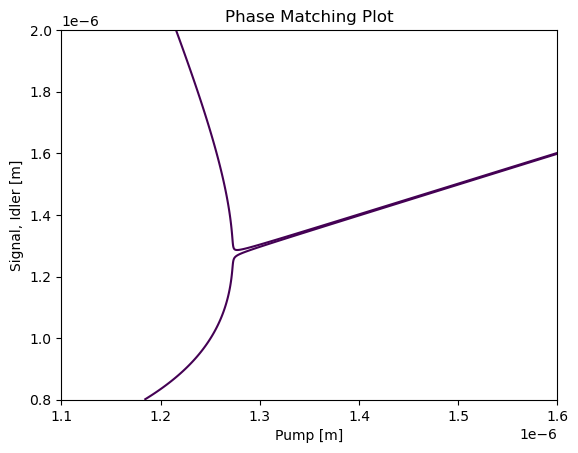

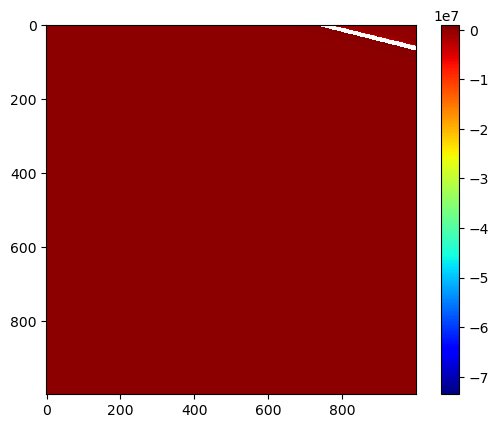

In [66]:
import matplotlib.pyplot as plt

# Input wavelengths in SI units [m]
def phase_matching(pump_wavelengths, signal_wavelengths, refractive_index, gamma = 2e-4, P = 100):
    # *** Construct the pump and signal matrices *** #
    pump_matrix_wavelengths = BuildMatrixFromArray(pump_wavelengths, len(signal_wavelengths), repeat_array_as = "rows")
    signal_matrix_wavelengths = BuildMatrixFromArray(signal_wavelengths, len(pump_wavelengths), repeat_array_as = "columns")

    # *** Convert to frequency *** #
    pump_matrix_omegas = lambda_to_ang_freq(pump_matrix_wavelengths)
    signal_matrix_omegas = lambda_to_ang_freq(signal_matrix_wavelengths)
    
    # *** Conservation of energy to create idler matrix *** #
    idler_matrix_omegas = 2 * pump_matrix_omegas - signal_matrix_omegas
    # *** Slightly different conversion needed for wavelength version *** #
    idler_matrix_wavelengths = 1 / (2/(pump_matrix_wavelengths) - 1/(signal_matrix_wavelengths))
    #idler_matrix_wavelengths = 2 * pump_matrix_wavelengths - signal_matrix_wavelengths

    
    # *** Find the betas *** #
    pump_betas = refractive_index(pump_matrix_wavelengths*1e9) * pump_matrix_omegas / 3e8
    signal_betas = refractive_index(signal_matrix_wavelengths*1e9) * signal_matrix_omegas / 3e8
    idler_betas = refractive_index(idler_matrix_wavelengths*1e9) * idler_matrix_omegas / 3e8
    print("wavelength idler matrix")
    print(idler_betas)

    # *** Phase matching: Momentum conservation *** #
    delta_beta = 2 * pump_betas - signal_betas - idler_betas - 2 * gamma * P
    # plt.imshow(delta_beta, cmap='jet', interpolation='nearest')
    # plt.colorbar()  # Add colorbar to show the scale
    # plt.show()
  
    phase_matching_contour = plt.contour(pump_wavelengths, signal_wavelengths, delta_beta, levels=[0], color='k')
    contour_data = phase_matching_contour.collections[0].get_paths()[0].vertices
    # plt.plot(contour_data)
    plt.xlabel('Pump [m]')
    plt.ylabel('Signal, Idler [m]')
    plt.title('Phase Matching Plot')  
    plt.show() 
    plt.imshow(delta_beta, cmap='jet', interpolation='nearest')
    plt.colorbar()  # Add colorbar to show the scale
    plt.show()
    #print(contour_data)

pump_wavelengths = np.linspace(1.1e-6, 1.6e-6, 1000)
signal_wavelengths = np.linspace(0.8e-6, 2.0e-6, 1000)
#refractive_index = RefractiveIndexClass.RefractiveIndex.n_fs
refractive_index = RefractiveIndex.n_fs
phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index) 

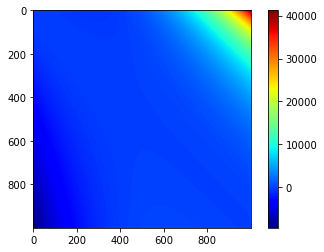

In [ ]:
# Plot the heatmap
import matplotlib.pyplot as plt
plt.imshow(delta_beta, cmap='jet', interpolation='nearest')
plt.colorbar()  # Add colorbar to show the scale
plt.show()

# Creating phase matching diagram for HCF

Should basically be identical code except plugging in the refractive index that we modelled for leaky mode HCFs (add this as a function to refractive index class)

C:\Users\met50\AppData\Local\Temp\ipykernel_11932\590315150.py:16: RuntimeWarning: divide by zero encountered in divide
  idler_matrix_wavelengths = 1 / (2/(pump_matrix_wavelengths) - 1/(signal_matrix_wavelengths))


wavelength idler matrix
[[ 3.56810466e+06  3.56290536e+06  3.55771079e+06 ... -8.68644716e+09
  -6.95491707e+10             nan]
 [ 3.57988825e+06  3.57468895e+06  3.56949438e+06 ... -2.22332777e+08
  -3.58482164e+08 -6.32812300e+08]
 [ 3.59163658e+06  3.58643727e+06  3.58124269e+06 ... -4.51097236e+07
  -5.91375515e+07 -7.96370864e+07]
 ...
 [ 8.27782210e+06  8.27262394e+06  8.26743059e+06 ...  4.71184203e+06
   4.70938096e+06  4.70692142e+06]
 [ 8.27971332e+06  8.27451512e+06  8.26932175e+06 ...  4.71373375e+06
   4.71127270e+06  4.70881317e+06]
 [ 8.28160229e+06  8.27640405e+06  8.27121064e+06 ...  4.71562320e+06
   4.71316215e+06  4.71070263e+06]]
[[1.48795820e-06 8.03603604e-07]
 [1.48788789e-06 8.03497568e-07]
 [1.48787671e-06 8.03603604e-07]]


C:\Users\met50\AppData\Local\Temp\ipykernel_11932\590315150.py:42: UserWarning: The following kwargs were not used by contour: 'color'
  phase_matching_contour = plt.contour(pump_wavelengths, signal_wavelengths, delta_beta, levels=[0], color='k')


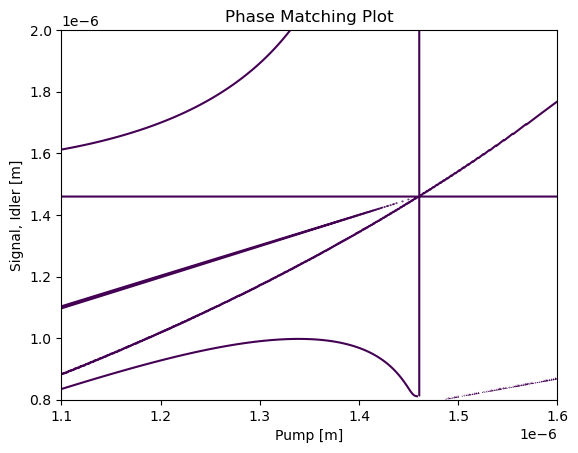

In [62]:
pump_wavelengths = np.linspace(1.1e-6, 1.6e-6, 1000)
signal_wavelengths = np.linspace(0.8e-6, 2.0e-6, 1000)
#refractive_index = RefractiveIndexClass.RefractiveIndex.n_fs
refractive_index = RefractiveIndex.HCF
phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index) 

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(delta_beta, cmap='jet', interpolation='nearest')
plt.colorbar()  # Add colorbar to show the scale
plt.show()

In [ ]:
ri_instance = RefractiveIndex()


pump_beta = RefractiveIndex.HCF(pump_frequency_matrix,parameter="omega") * pump_frequency_matrix / 3e8
signal_beta = RefractiveIndex.HCF(signal_frequency_matrix, parameter="omega") * signal_frequency_matrix / 3e8
idler_beta = RefractiveIndex.HCF(idler_frequency_matrix, parameter="omega") * idler_frequency_matrix / 3e8

gamma = 2e-4 #Unit is m^-1 W^-1
P = 100 # W

# Momentum conservation equation
delta_beta = 2*pump_beta - signal_beta - idler_beta - 2*gamma*P
delta_beta

TypeError: __init__() takes 0 positional arguments but 1 was given

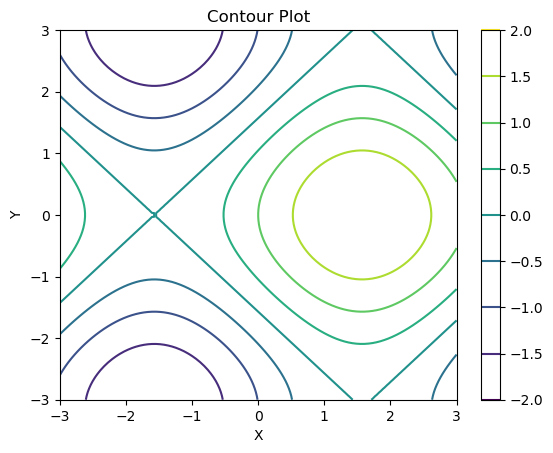

In [ ]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)

# Create contour plot
plt.contour(X, Y, Z)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot')
plt.colorbar()  # Add color bar to show the scale
plt.show()

# Modelling for HCF filled with noble gas

Equation 22 of Markos paper will let us calculate the bulk refractive index of the gas in the fibre.  
$$ n^{2}_{gas} - 1 = Re(\chi_{e}) =  \sum_{t}^{} \frac{N_{t}}{N_{t,0}}Re(\chi_{t,e})  $$  
Or can use this equation from Borzsonyi 2008 paper:  
$$ n^{2}(\lambda,p,T) - 1 = \frac{p}{p_{0}}\frac{T_{0}}{T} [\frac{B_{1}\lambda^{2}}{\lambda^{2}-C_{1}} + \frac{B_{2}\lambda^{2}}{\lambda^{2}-C_{2}}] $$